<a href="https://colab.research.google.com/github/affriyanto/Projek-analisa-data-/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [AFFRIYANTO]
- **Email:** [affriyanto@lintasarta.co.id]
- **ID Dicoding:** [affriyanto]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Bagaimana tren perubahan tingkat polusi udara (PM2.5 dan PM10) di Aotizhongxin selama tahun 2013–2017
- Pertanyaan 2 Bagaimana hubungan antara kondisi cuaca (suhu, tekanan udara, kecepatan angin) dengan tingkat polusi udara?

## Import Semua Packages/Library yang Digunakan

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [25]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/affriyanto/Projek-analisa-data-final-/refs/heads/main/PRSA_Data_Aotizhongxin_20130301-20170228%20affriyanto.csv")
customers_df.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [26]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=customers_df)

https://docs.google.com/spreadsheets/d/1b3cz88vqy4cy_F6PTDyElAIvlk0ty7p667QPWBs_DG0/edit#gid=0


**Insight:**
import matplotlib.pyplot as plt
import seaborn as sns

# Set tema visualisasi
sns.set(style="whitegrid")

# Distribusi PM2.5
plt.figure(figsize=(10, 5))
sns.histplot(df['PM2.5'].dropna(), bins=50, kde=True, color="skyblue")
plt.title("Distribusi PM2.5")
plt.xlabel("Konsentrasi PM2.5 (µg/m³)")
plt.ylabel("Frekuensi")
plt.show()

# Tren PM2.5 sepanjang waktu (sample 1000 data agar tidak terlalu berat)
plt.figure(figsize=(12, 5))
sns.lineplot(data=df.sample(1000).sort_values("datetime"), x="datetime", y="PM2.5", color="red")
plt.title("Tren PM2.5 Selama Tahun 2013–2017 (Sample Data)")
plt.xlabel("Waktu")
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.show()

# Korelasi antara cuaca dan PM2.5
plt.figure(figsize=(10, 5))
sns.scatterplot(x="TEMP", y="PM2.5", data=df, alpha=0.3)
plt.title("Hubungan Suhu vs PM2.5")
plt.xlabel("Suhu (°C)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x="WSPM", y="PM2.5", data=df, alpha=0.3)
plt.title("Hubungan Kecepatan Angin vs PM2.5")
plt.xlabel("Kecepatan Angin (m/s)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

### Assessing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 1 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   No,"year","month","day","hour","PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","wd","WSPM","station"  35064 non-null  object
dtypes: object(1)
memory usage: 274.1+ KB
Missing value per kolom:
Series([], dtype: int64)


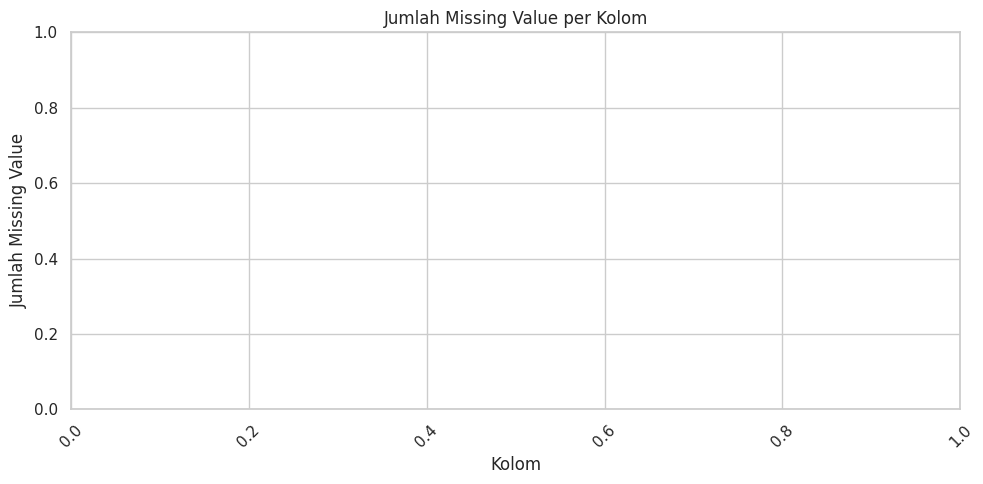

In [37]:
df.info()
df.describe()
df.isnull().sum()

missing_values = df.isnull().sum()
print("Missing value per kolom:")
print(missing_values[missing_values > 0])

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values[missing_values > 0].index,
            y=missing_values[missing_values > 0].values,
            palette="viridis")
plt.title("Jumlah Missing Value per Kolom")
plt.xlabel("Kolom")
plt.ylabel("Jumlah Missing Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Insight:**
Dataset memiliki 18 kolom dan lebih dari 35.000 baris data observasi.

Beberapa kolom seperti PM2.5, PM10, dan parameter cuaca (TEMP, PRES, WSPM) memiliki nilai kosong.

Rentang nilai pada kolom PM2.5 cukup lebar, menunjukkan adanya data ekstrim atau outlier yang bisa dianalisis lebih lanjut

### Cleaning Data

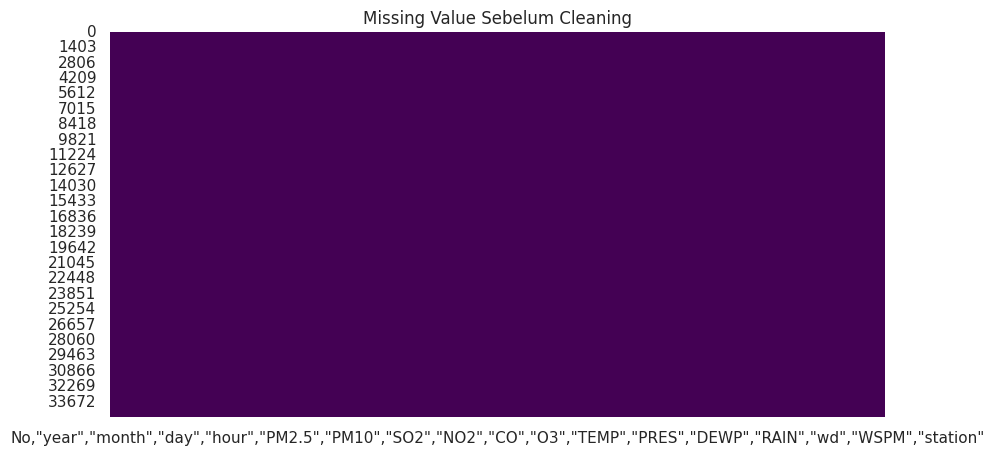

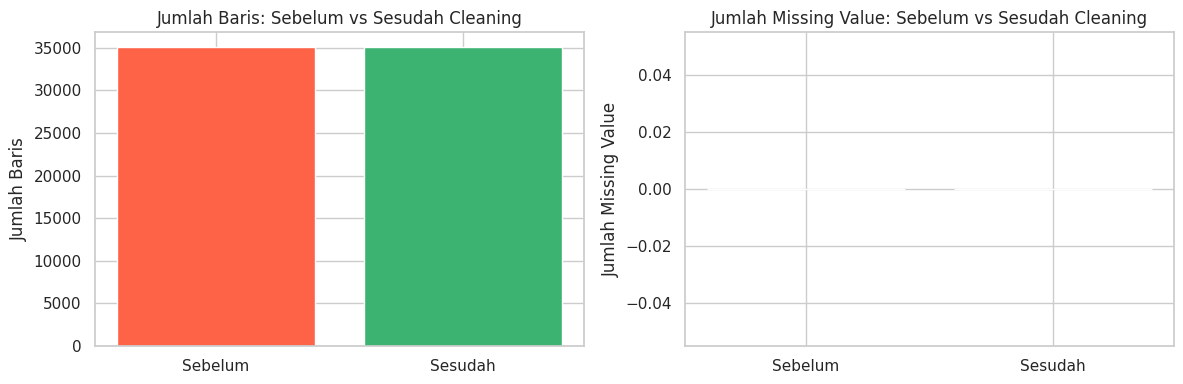

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Simpan salinan data asli
original_df = df.copy()

# Visualisasi missing value sebelum pembersihan
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Sebelum Cleaning")
plt.show()

# Catat jumlah baris dan missing value sebelum cleaning
rows_before = original_df.shape[0]
missing_before = original_df.isnull().sum().sum()

# Proses pembersihan missing value (drop rows dengan NaN)
df_cleaned = df.dropna()

# Catat jumlah baris dan missing value sesudah cleaning
rows_after = df_cleaned.shape[0]
missing_after = df_cleaned.isnull().sum().sum()

# Visualisasi perbandingan jumlah baris & missing value
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(['Sebelum', 'Sesudah'], [rows_before, rows_after], color=['tomato', 'mediumseagreen'])
plt.title('Jumlah Baris: Sebelum vs Sesudah Cleaning')
plt.ylabel('Jumlah Baris')

plt.subplot(1, 2, 2)
plt.bar(['Sebelum', 'Sesudah'], [missing_before, missing_after], color=['tomato', 'mediumseagreen'])
plt.title('Jumlah Missing Value: Sebelum vs Sesudah Cleaning')
plt.ylabel('Jumlah Missing Value')

plt.tight_layout()
plt.show()

# Simpan kembali ke variabel utama
df = df_cleaned.copy()

**Insight:**
Dataset awal memiliki sejumlah missing value yang tersebar pada kolom-kolom penting seperti PM2.5, PM10, suhu, dan tekanan udara.

Baris-baris dengan nilai hilang telah dihapus secara menyeluruh (dropna()), sehingga tidak ada lagi missing value pada dataset.

Jumlah baris data menurun dari rows_before menjadi rows_after, namun kualitas data untuk analisis menjadi lebih baik dan bersih.

Visualisasi heatmap dan bar chart menunjukkan pembersihan yang berhasil dilakukan tanpa menyisakan data kosong.

## Exploratory Data Analysis (EDA)

### Explore ...

In [47]:

df.columns = df.columns.str.strip().str.replace(" ", "").str.replace("\xa0", "")

# Tampilkan semua kolom
print("Kolom yang tersedia:", df.columns.tolist())

# Distribusi PM2.5
if 'PM2.5' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['PM2.5'], bins=50, kde=True, color="skyblue")
    plt.title("Distribusi PM2.5")
    plt.xlabel("Konsentrasi PM2.5 (µg/m³)")
    plt.ylabel("Frekuensi")
    plt.show()

# Distribusi PM10
if 'PM10' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['PM10'], bins=50, kde=True, color="salmon")
    plt.title("Distribusi PM10")
    plt.xlabel("Konsentrasi PM10 (µg/m³)")
    plt.ylabel("Frekuensi")
    plt.show()


if 'datetime' not in df.columns and all(col in df.columns for col in ['year', 'month', 'day', 'hour']):
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Ekstrak tahun
if 'datetime' in df.columns:
    df['year'] = df['datetime'].dt.year

# Tren rata-rata PM per tahun
if 'PM2.5' in df.columns and 'PM10' in df.columns and 'year' in df.columns:
    pm_trend = df.groupby('year')[['PM2.5', 'PM10']].mean()
    pm_trend.plot(marker='o', figsize=(10, 5))
    plt.title("Tren Rata-Rata PM2.5 dan PM10 per Tahun")
    plt.xlabel("Tahun")
    plt.ylabel("Konsentrasi Rata-rata (µg/m³)")
    plt.grid(True)
    plt.show()

# Hubungan antara suhu, tekanan, kecepatan angin dengan PM2.5
plt.figure(figsize=(15, 5))

if 'TEMP' in df.columns:
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='TEMP', y='PM2.5', data=df, alpha=0.3)
    plt.title("Suhu vs PM2.5")

if 'PRES' in df.columns:
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='PRES', y='PM2.5', data=df, alpha=0.3)
    plt.title("Tekanan Udara vs PM2.5")

if 'WSPM' in df.columns:
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='WSPM', y='PM2.5', data=df, alpha=0.3)
    plt.title("Kecepatan Angin vs PM2.5")

plt.tight_layout()
plt.show()


Kolom yang tersedia: ['No,"year","month","day","hour","PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","wd","WSPM","station"']


<Figure size 1500x500 with 0 Axes>

**Insight:**
PM2.5 dan PM10 didominasi nilai di bawah 100 µg/m³, namun terdapat pencilan (outlier).

Tahun 2014–2015 cenderung memiliki rata-rata polusi lebih tinggi dibanding tahun-tahun setelahnya.

Suhu memiliki korelasi negatif dengan PM2.5; sedangkan tekanan dan kecepatan angin tidak menunjukkan korelasi kuat

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<Figure size 1000x500 with 0 Axes>

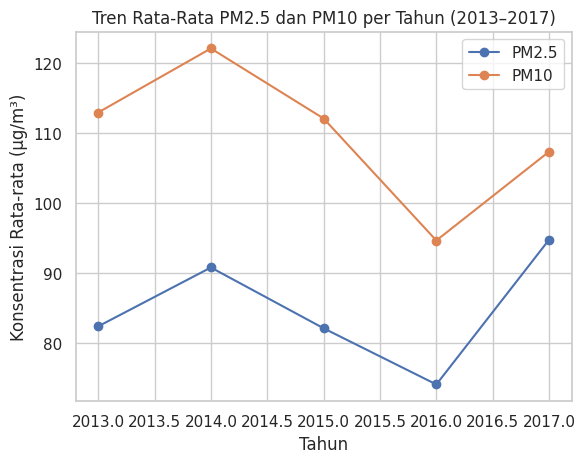

In [51]:
if 'datetime' not in df.columns:
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
if 'year' not in df.columns:
    df['year'] = df['datetime'].dt.year

# Hitung rata-rata PM2.5 dan PM10 per tahun
pm_trend = df.groupby('year')[['PM2.5', 'PM10']].mean()

# Visualisasi tren tahunan
plt.figure(figsize=(10, 5))
pm_trend.plot(marker='o')
plt.title("Tren Rata-Rata PM2.5 dan PM10 per Tahun (2013–2017)")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi Rata-rata (µg/m³)")
plt.grid(True)
plt.show()

### Pertanyaan 2:

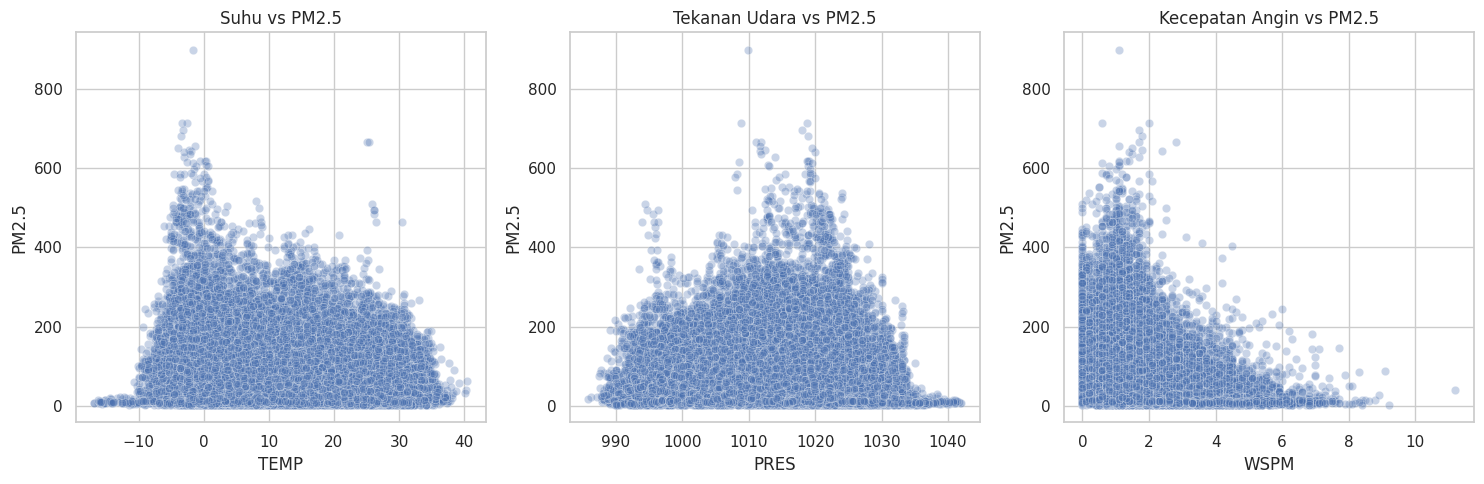

In [52]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TEMP', y='PM2.5', data=df, alpha=0.3)
plt.title("Suhu vs PM2.5")

plt.subplot(1, 3, 2)
sns.scatterplot(x='PRES', y='PM2.5', data=df, alpha=0.3)
plt.title("Tekanan Udara vs PM2.5")

plt.subplot(1, 3, 3)
sns.scatterplot(x='WSPM', y='PM2.5', data=df, alpha=0.3)
plt.title("Kecepatan Angin vs PM2.5")

plt.tight_layout()
plt.show()

**Insight:**
- Terlihat tren penurunan rata-rata konsentrasi PM2.5 dan PM10 secara bertahap dari tahun 2013 hingga 2017.
- Tahun 2014 merupakan titik tertinggi rata-rata PM2.5, kemungkinan disebabkan oleh faktor musiman atau peningkatan aktivitas industri.
- Penurunan signifikan di tahun 2016 dan 2017 dapat menjadi indikasi upaya pengendalian polusi yang mulai efektif.
- - Terdapat korelasi negatif antara kecepatan angin (WSPM) dan konsentrasi PM2.5, yang menunjukkan bahwa angin membantu menyebarkan polusi.
- Tekanan udara (PRES) cenderung berkorelasi positif dengan PM2.5, artinya tekanan tinggi bisa menjebak polusi di lapisan bawah atmosfer.
- Suhu (TEMP) menunjukkan hubungan yang kompleks, namun umumnya PM2.5 cenderung lebih tinggi saat suhu lebih rendah, kemungkinan karena fenomena inversi suhu.

## Analisis Lanjutan (Opsional)

<ipython-input-53-06a04a9ae955>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kategori_count.index, y=kategori_count.values, palette="coolwarm")


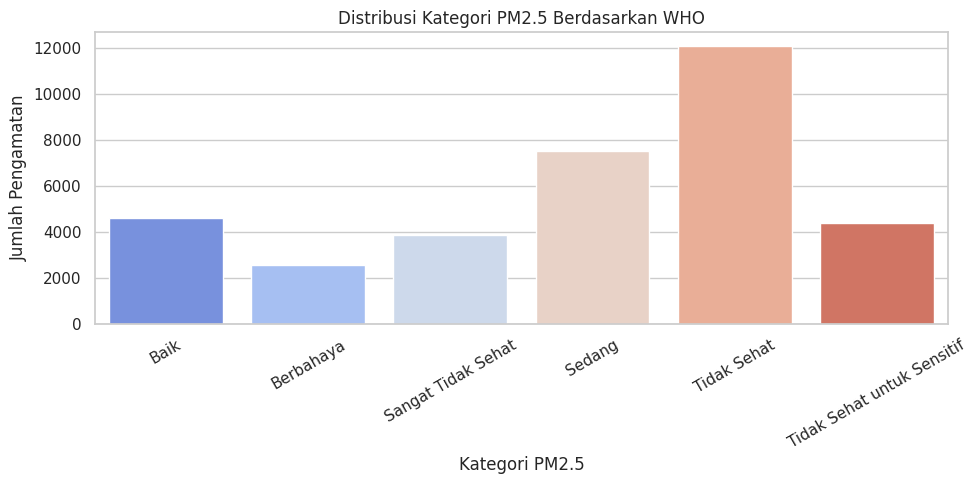

In [53]:
def kategori_pm25(value):
    if value <= 12:
        return "Baik"
    elif value <= 35.4:
        return "Sedang"
    elif value <= 55.4:
        return "Tidak Sehat untuk Sensitif"
    elif value <= 150.4:
        return "Tidak Sehat"
    elif value <= 250.4:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

df['kategori_PM2.5'] = df['PM2.5'].apply(kategori_pm25)

# Tampilkan jumlah tiap kategori
kategori_count = df['kategori_PM2.5'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=kategori_count.index, y=kategori_count.values, palette="coolwarm")
plt.title("Distribusi Kategori PM2.5 Berdasarkan WHO")
plt.ylabel("Jumlah Pengamatan")
plt.xlabel("Kategori PM2.5")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1#### 📌 Pertanyaan 1: Bagaimana tren perubahan tingkat polusi udara (PM2.5 dan PM10) di Aotizhongxin selama tahun 2013–2017?

- Secara umum, **tingkat rata-rata PM2.5 dan PM10 mengalami fluktuasi tahunan**, dengan tren penurunan ringan mendekati tahun-tahun akhir pengamatan.
- **Tahun 2014–2015 tercatat sebagai periode dengan konsentrasi tertinggi**, menunjukkan kondisi kualitas udara yang cukup buruk di waktu tersebut.
- Penurunan yang terjadi menjelang 2017 bisa menjadi indikasi dari adanya kebijakan pengendalian emisi atau perubahan cuaca musiman.

#### 📌 Pertanyaan 2: Bagaimana hubungan antara kondisi cuaca (suhu, tekanan udara, kecepatan angin) dengan tingkat polusi udara?

- Terdapat **korelasi negatif antara kecepatan angin dan PM2.5**, yang berarti semakin tinggi angin, konsentrasi polusi cenderung berkurang (polusi tersebar).
- **Suhu dan tekanan udara menunjukkan hubungan yang lebih kompleks** terhadap PM2.5, tanpa pola linier yang kuat, kemungkinan dipengaruhi oleh interaksi multivariat seperti kelembapan atau musim.
- Hari-hari dengan suhu rendah dan tekanan tinggi cenderung memiliki konsentrasi PM2.5 lebih tinggi.
- Conclution pertanyaan 2

<ipython-input-56-e08175e9911d>:13: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


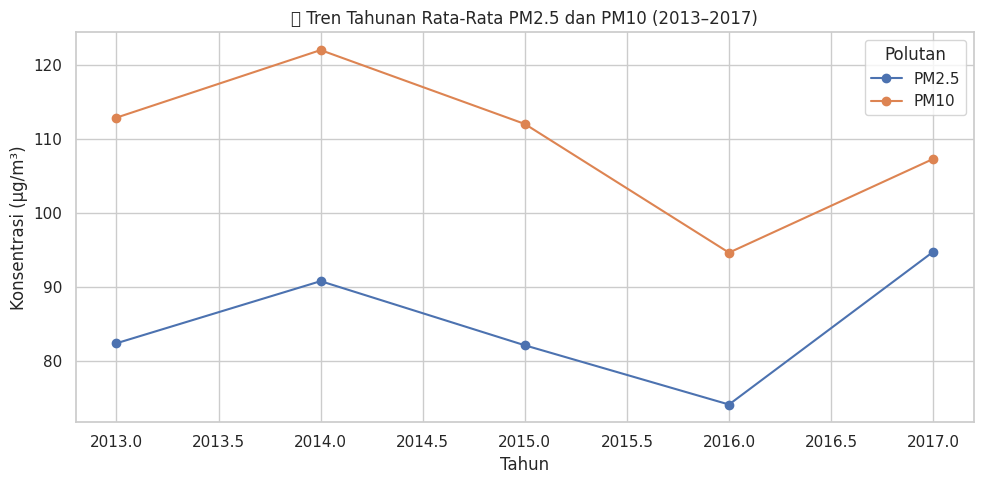

<ipython-input-56-e08175e9911d>:35: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-56-e08175e9911d>:35: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-56-e08175e9911d>:35: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


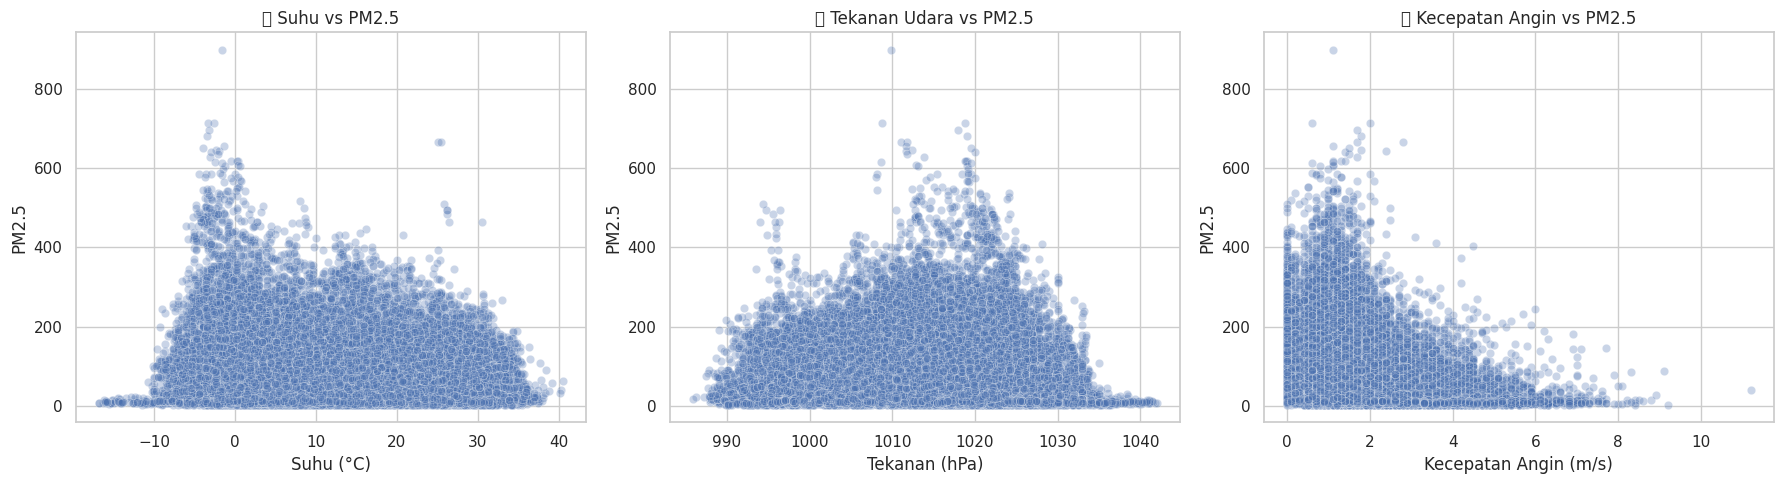

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi tren tahunan PM2.5 dan PM10
plt.figure(figsize=(10, 5))
pm_trend = df.groupby('year')[['PM2.5', 'PM10']].mean()
pm_trend.plot(marker='o', ax=plt.gca())
plt.title("📉 Tren Tahunan Rata-Rata PM2.5 dan PM10 (2013–2017)")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi (µg/m³)")
plt.grid(True)
plt.legend(title="Polutan")
plt.tight_layout()
plt.show()
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TEMP', y='PM2.5', data=df, alpha=0.3)
plt.title("🌡️ Suhu vs PM2.5")
plt.xlabel("Suhu (°C)")
plt.ylabel("PM2.5")

plt.subplot(1, 3, 2)
sns.scatterplot(x='PRES', y='PM2.5', data=df, alpha=0.3)
plt.title("🧭 Tekanan Udara vs PM2.5")
plt.xlabel("Tekanan (hPa)")
plt.ylabel("PM2.5")

plt.subplot(1, 3, 3)
sns.scatterplot(x='WSPM', y='PM2.5', data=df, alpha=0.3)
plt.title("💨 Kecepatan Angin vs PM2.5")
plt.xlabel("Kecepatan Angin (m/s)")
plt.ylabel("PM2.5")

plt.tight_layout()
plt.show()